## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [7]:
import pickle
import numpy as np

In [8]:
with open("../../data/QA chatbot/train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [9]:
with open("../../data/QA chatbot/test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

----

## Exploring the Format of the Data

In [10]:
type(test_data)

list

In [11]:
type(train_data)

list

In [12]:
len(test_data)

1000

In [13]:
len(train_data)

10000

In [14]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [17]:
train_data[-5:]

[(['Daniel',
   'went',
   'to',
   'the',
   'office',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Daniel',
   'went',
   'to',
   'the',
   'office',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'hallway',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'got',
   'the',
   'apple',
   'there',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
  'yes'),
 (['Daniel',
   'went',
   'to',
   'the',
   'office',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'hallway',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'got',
   'the',
   'apple',
   'there',
   '.',
   'Sandra',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Mary',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Dan

In [19]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [20]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [21]:
train_data[0][2]

'no'

-----

## Setting up Vocabulary of All Words

In [25]:
# Create a set that holds the vocab words
vocab = set()

In [26]:
all_data = test_data + train_data

In [27]:
for story, question, answer in all_data:
    # In case you don't know what a union of sets is:
    # https://www.programiz.com/python-programming/methods/set/union
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [28]:
vocab.add('no')
vocab.add('yes')

In [30]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [31]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [32]:
max_story_len = max([len(data[0]) for data in all_data])

In [33]:
max_story_len

156

In [34]:
max_question_len = max([len(data[1]) for data in all_data])

In [35]:
max_question_len

6

## Vectorizing the Data

In [36]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [37]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

-----------

In [38]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [39]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [41]:
tokenizer.word_index

{'mary': 1,
 'journeyed': 2,
 'kitchen': 3,
 'milk': 4,
 'got': 5,
 'daniel': 6,
 'no': 7,
 'travelled': 8,
 'discarded': 9,
 'went': 10,
 'bathroom': 11,
 'bedroom': 12,
 'hallway': 13,
 'back': 14,
 '?': 15,
 'left': 16,
 'yes': 17,
 'is': 18,
 'took': 19,
 'moved': 20,
 'sandra': 21,
 'in': 22,
 'down': 23,
 'football': 24,
 'office': 25,
 'the': 26,
 'dropped': 27,
 'grabbed': 28,
 'to': 29,
 'garden': 30,
 'picked': 31,
 'apple': 32,
 'john': 33,
 'up': 34,
 'put': 35,
 '.': 36,
 'there': 37}

In [47]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [48]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [49]:
len(train_story_text)

10000

In [46]:
len(train_story_seq)

10000

In [31]:
# word_index = tokenizer.word_index

### Functionalize Vectorization

In [50]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)

    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''

    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []

    for story, query, answer in data:

        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        print(f'x:{x}')
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        print(f'xq:{xq}')
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        print(f'<y:{y}')
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        print(f'>y:{y}')

        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)

    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.

    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [52]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

x:[1, 20, 29, 26, 11, 36, 21, 2, 29, 26, 12, 36]
xq:[18, 21, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 20, 29, 26, 11, 36, 21, 2, 29, 26, 12, 36, 1, 10, 14, 29, 26, 12, 36, 6, 10, 14, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 20, 29, 26, 11, 36, 21, 2, 29, 26, 12, 36, 1, 10, 14, 29, 26, 12, 36, 6, 10, 14, 29, 26, 13, 36, 21, 10, 29, 26, 3, 36, 6, 10, 14, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 25, 36, 1, 5, 26, 24, 37, 36, 21, 10, 29, 26, 12, 36, 1, 9, 26, 24, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 25, 36, 1, 5, 26, 24, 37, 36, 21, 10, 29, 26, 12, 36, 1, 9, 26, 24, 36, 21, 31, 34, 26, 24, 37, 36, 33, 2, 29, 26, 11, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 25, 36, 1, 5, 26, 24, 37, 36, 21, 10, 29, 26, 12

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 28, 26, 4, 37, 36, 21, 31, 34, 26, 32, 37, 36, 33, 8, 29, 26, 3, 36, 21, 35, 23, 26, 32, 37, 36, 21, 19, 26, 32, 37, 36, 6, 10, 29, 26, 13, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 28, 26, 4, 37, 36, 21, 31, 34, 26, 32, 37, 36, 33, 8, 29, 26, 3, 36, 21, 35, 23, 26, 32, 37, 36, 21, 19, 26, 32, 37, 36, 6, 10, 29, 26, 13, 36, 1, 10, 29, 26, 12, 36, 21, 8, 29, 26, 12, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 28, 26, 4, 37, 36, 21, 31, 34, 26, 32, 37, 36, 33, 8, 29, 26, 3, 36, 2

xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 31, 34, 26, 32, 37, 36, 1, 27, 26, 32, 36, 6, 10, 29, 26, 11, 36, 6, 2, 29, 26, 30, 36, 6, 31, 34, 26, 24, 37, 36, 6, 9, 26, 24, 36, 33, 20, 29, 26, 12, 36, 21, 10, 14, 29, 26, 12, 36, 6, 10, 14, 29, 26, 12, 36, 6, 2, 29, 26, 3, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 31, 34, 26, 32, 37, 36, 1, 27, 26, 32, 36, 6, 10, 29, 26, 11, 36, 6, 2, 29, 26, 30, 36, 6, 31, 34, 26, 24, 37, 36, 6, 9, 26, 24, 36, 33, 20, 29, 26, 12, 36, 21, 10, 14, 29, 26, 12, 36, 6, 10, 14, 29, 26, 12, 36, 6, 2, 29, 

x:[6, 31, 34, 26, 32, 37, 36, 33, 10, 14, 29, 26, 25, 36, 6, 16, 26, 32, 36, 33, 28, 26, 4, 37, 36, 33, 10, 29, 26, 13, 36, 1, 2, 29, 26, 3, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 31, 34, 26, 32, 37, 36, 33, 10, 14, 29, 26, 25, 36, 6, 16, 26, 32, 36, 33, 28, 26, 4, 37, 36, 33, 10, 29, 26, 13, 36, 1, 2, 29, 26, 3, 36, 6, 28, 26, 32, 37, 36, 6, 9, 26, 32, 37, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 31, 34, 26, 32, 37, 36, 33, 10, 14, 29, 26, 25, 36, 6, 16, 26, 32, 36, 33, 28, 26, 4, 37, 36, 33, 10, 29, 26, 13, 36, 1, 2,

<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 12, 36, 6, 2, 29, 26, 11, 36, 1, 8, 29, 26, 12, 36, 1, 10, 29, 26, 3, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 12, 36, 6, 2, 29, 26, 11, 36, 1, 8, 29, 26, 12, 36, 1, 10, 29, 26, 3, 36, 33, 2, 29, 26, 11, 36, 33, 10, 14, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 31, 34, 26, 4, 37, 36, 1, 2, 29, 26, 3, 36, 21, 19, 26, 24, 37, 36, 33, 10, 29, 26, 25, 36, 21, 27, 26, 24, 37, 36, 21, 35, 23, 26, 4, 37, 36, 21, 5, 26, 4, 37, 36, 21, 35, 23, 26, 4, 36, 21, 5, 26, 4, 37, 36, 21, 16, 26, 4, 36, 21, 10, 14, 29, 26, 13, 36, 21, 10, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 30, 36, 6, 8, 29, 26, 30, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 30, 36, 6, 8, 29, 26, 30, 36, 1, 10, 29, 26, 25, 36, 21, 2, 29, 26, 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 12, 36, 6, 28, 26, 32, 37, 36, 6, 8, 29, 26, 13, 36, 21, 10, 29, 26, 13, 36, 1, 10, 14, 29, 26, 3, 36, 33, 10, 14, 29, 26, 3, 36, 6, 35, 23, 26, 32, 36, 6, 28, 26, 32, 37, 36, 21, 20, 29, 26, 12, 36, 6, 8, 29, 26, 25, 36]
xq:[18, 21, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 13, 36, 21, 2, 29, 26, 11, 36]
xq:[18, 21, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 13, 36, 33, 8, 29, 26, 11, 36, 1, 10, 14, 29, 26, 13, 36, 33, 19, 26, 24, 37, 36]
xq:[18, 33, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 13, 36, 33, 8, 29, 26, 11, 36, 1, 10, 14, 29, 26, 13, 36, 33, 19, 26, 24, 37, 36, 21, 20, 29, 26, 11, 36, 33, 27, 26, 24, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 13, 36, 33, 8, 29, 26, 11, 36, 1, 1

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 24, 37, 36, 33, 19, 26, 4, 37, 36, 1, 10, 29, 26, 11, 36, 33, 10, 14, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 24, 37, 36, 33, 19, 26, 4, 37, 36, 1, 10, 29, 26, 11, 36, 33, 10, 14, 29, 26, 3, 36, 6, 10, 29, 26, 11, 36, 1, 10, 14, 29, 26, 12, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 24, 37, 36, 33, 19, 26, 4, 37, 36, 1,

>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 25, 36, 21, 8, 29, 26, 11, 36, 1, 8, 29, 26, 12, 36, 33, 10, 14, 29, 26, 11, 36, 33, 2, 29, 26, 13, 36, 33, 20, 29, 26, 3, 36, 1, 5, 26, 4, 37, 36, 33, 5, 26, 32, 37, 36, 1, 10, 29, 26, 11, 36, 6, 10, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 31, 34, 26, 4, 37, 36, 1, 2, 29, 26, 13, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 31, 34, 26, 4, 37, 36, 1, 2, 29, 26, 13, 36, 33, 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 12, 36, 21, 5, 26, 32, 37, 36, 6, 10, 14, 29, 26, 11, 36, 21, 10, 14, 29, 26, 11, 36, 33, 2, 29, 26, 12, 36, 33, 28, 26, 4, 37, 36, 6, 2, 29, 26, 30, 36, 33, 2, 29, 26, 3, 36, 21, 27, 26, 32, 36, 21, 20, 29, 26, 13, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 4, 37, 36, 21, 28, 26, 32, 37, 36, 1, 10, 14, 29, 26, 30, 36, 21, 16, 26, 32, 37, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 8, 29, 26, 12, 36, 6, 2, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 8, 29, 26, 12, 36, 6, 2, 29, 26, 30, 36, 21, 20, 29, 26, 30, 36, 21, 5, 26, 32, 37, 36]
xq:[18, 21, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 8, 29, 26, 12, 36, 6, 2, 29, 26, 30, 36, 21, 20, 29, 26, 30, 36, 21, 5, 26, 32, 37, 36, 1, 8, 29, 26, 30, 36, 33, 20, 29, 26, 13, 36]
xq:[18, 1, 22, 2

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 13, 36, 6, 8, 29, 26, 3, 36, 21, 5, 26, 24, 37, 36, 21, 16, 26, 24, 36]
xq:[18, 33, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 13, 36, 6, 8, 29, 26, 3, 36, 21, 5, 26, 24, 37, 36, 21, 16, 26, 24, 36, 1, 19, 26, 24, 37, 36, 6, 10, 14, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 13, 36, 6, 8, 29, 26, 3, 36, 21, 5, 26, 24, 37, 36, 21, 16, 26, 24, 36, 1, 19, 26, 24, 37, 36, 6, 10, 14, 29, 26, 13, 36, 33, 10, 14, 29, 26, 12, 36, 21, 8, 29, 26, 11, 3

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 30, 36, 33, 2, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 30, 36, 33, 2, 29, 26, 25, 36, 6, 20, 29, 26, 13, 36, 21, 8, 29, 26, 11, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 30, 36, 33, 2, 29, 26, 25, 36, 6, 20, 29, 26, 13, 36, 21, 8, 29, 26, 11, 36, 33, 8, 29, 26, 13, 36, 21, 8, 29, 26, 30, 36]
xq:[18, 6, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 24, 37, 36, 1, 10, 29, 26, 11, 36, 21, 35, 23, 26, 24, 36, 6, 10, 29, 26, 30, 36]
xq:[18, 1, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 24, 37, 36, 1, 10, 29, 26, 11, 36, 21, 35, 23, 26, 24, 36, 6, 10, 29, 26, 30, 36, 21, 20, 29, 26, 13, 36, 21, 8, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 24, 37, 36, 1, 10, 29, 26, 11, 36, 21, 35, 23, 26, 24, 36, 6, 10, 29, 26, 30, 36, 21, 20, 29, 26, 13, 36, 21, 8, 29, 26, 3, 36, 33, 28, 26, 32, 37, 36, 33, 8, 29, 26,

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 11, 36, 21, 2, 29, 26, 25, 36, 21, 5, 26, 4, 37, 36, 33, 20, 29, 26, 3, 36, 1, 10, 14, 29, 26, 13, 36, 33, 20, 29, 26, 25, 36, 1, 2, 29, 26, 25, 36, 33, 10, 29, 26, 11, 36, 6, 10, 29, 26, 12, 36, 21, 35, 23, 26, 4, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 31, 34, 26, 24, 37, 36, 21, 9, 26, 24, 36, 1, 31, 34, 26, 4, 37, 36, 33, 2, 29, 26, 3, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 31, 34, 26, 24, 37, 36, 21, 9, 26, 24, 36, 1, 31, 34, 26, 4, 37, 36, 33, 2

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 11, 36, 1, 2, 29, 26, 25, 36, 1, 2, 29, 26, 3, 36, 33, 2, 29, 26, 12, 36]
xq:[18, 21, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 11, 36, 1, 2, 29, 26, 25, 36, 1, 2, 29, 26, 3, 36, 33, 2, 29, 26, 12, 36, 21, 31, 34, 26, 4, 37, 36, 6, 10, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 11, 36, 1, 2, 29, 26, 25, 36, 1, 2, 29, 26, 3, 3

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 5, 26, 4, 37, 36, 21, 10, 29, 26, 11, 36, 33, 16, 26, 4, 36, 21, 8, 29, 26, 12, 36, 6, 5, 26, 32, 37, 36, 33, 8, 29, 26, 11, 36, 1, 20, 29, 26, 13, 36, 1, 19, 26, 4, 37, 36, 1, 35, 23, 26, 4, 37, 36, 1, 19, 26, 4, 37, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 32, 37, 36, 21, 2, 29, 26, 30, 36]
xq:[18, 21, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 32, 37, 36, 21, 2, 29, 26, 30, 36, 21, 10, 14, 29, 26, 11, 36, 6, 10, 14, 29, 26, 13, 36]
xq:[18, 21, 22, 26, 11, 15]
<y:[0. 0. 0

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 8, 29, 26, 13, 36, 21, 2, 29, 26, 3, 36, 33, 10, 14, 29, 26, 11, 36, 6, 31, 34, 26, 4, 37, 36, 21, 10, 14, 29, 26, 25, 36, 6, 10, 14, 29, 26, 12, 36, 33, 10, 14, 29, 26, 13, 36, 33, 10, 14, 29, 26, 3, 36, 1, 2, 29, 26, 12, 36, 1, 2, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 24, 37, 36, 21, 2, 29, 26, 25, 36]
xq:[18, 21, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 13, 36, 21, 2, 29, 26, 30, 36, 33, 8, 29, 26, 30, 36, 21, 20, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 13, 36, 21, 2, 29, 26, 30, 36, 33, 8, 29, 26, 30, 36, 21, 20, 29, 26, 25, 36, 21, 20, 29, 26, 3, 36, 33, 31, 34, 26, 24, 37, 36]
xq:[18, 21, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 30, 36, 1, 31, 34, 26, 32, 37, 36, 21, 8, 29, 26, 11, 36, 6, 8, 29, 26, 25, 36, 1, 35, 23, 26, 32, 37, 36, 1, 19, 26, 32, 37, 36, 1, 20, 29, 26, 30, 36, 33, 20, 29, 26, 25, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 30, 36, 1, 31, 34, 26, 32, 37, 36, 21, 8, 29, 26, 11, 36, 6, 8, 29, 26, 25, 36, 1, 35, 23, 26, 32, 37, 36, 1, 19, 26, 32, 37, 36, 1, 20, 29, 26, 30, 36, 33, 20, 29, 26, 25, 36, 1, 35, 23, 26, 32, 36, 6, 10, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 8, 29, 26, 30, 36, 6, 2, 29, 26, 25, 36, 21, 10, 14, 29, 26, 13, 36, 33, 2, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 8, 29, 26, 30, 36, 6, 2, 29, 26, 25, 36, 21, 10, 14, 29, 26, 13, 36, 33, 2, 29, 26, 3, 36, 6, 8, 29, 26, 30, 36, 6, 20, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 8, 29, 26, 30, 36, 6, 2, 29, 26, 25, 36, 21, 10, 14, 29, 26, 13, 36, 33, 2, 29, 26, 3, 36, 6, 8, 29, 26, 30, 36, 6, 20, 29, 26, 11, 36, 6, 2, 29, 26, 12, 36, 6, 20, 29, 26, 11, 

xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 28, 26, 32, 37, 36, 1, 35, 23, 26, 32, 36, 21, 20, 29, 26, 13, 36, 6, 10, 14, 29, 26, 30, 36, 21, 5, 26, 32, 37, 36, 33, 2, 29, 26, 3, 36, 33, 19, 26, 24, 37, 36, 33, 10, 14, 29, 26, 13, 36, 21, 9, 26, 32, 37, 36, 6, 10, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 28, 26, 32, 37, 36, 1, 35, 23, 26, 32, 36, 21, 20, 29, 26, 13, 36, 6, 10, 14, 29, 26, 30, 36, 21, 5, 26, 32, 37, 36, 33, 2, 29, 26, 3, 36, 33, 19, 26, 24, 37, 36, 33, 10, 14, 29, 26, 13, 36, 21, 9, 26, 32, 37, 36, 6,

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 12, 36, 6, 2, 29, 26, 30, 36, 6, 20, 29, 26, 12, 36, 33, 10, 29, 26, 3, 36, 21, 8, 29, 26, 25, 36, 1, 20, 29, 26, 13, 36, 33, 10, 29, 26, 25, 36, 6, 10, 14, 29, 26, 30, 36, 6, 20, 29, 26, 3, 36, 1, 10, 14, 29, 26, 30, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 19, 26, 24, 37, 36, 6, 9, 26, 24, 37, 36, 33, 28, 26, 24, 37, 36, 1, 10, 14, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 30, 36, 6, 8, 29, 26, 13, 36, 21, 20, 29, 26, 12, 36, 1, 5, 26, 4, 37, 36]
xq:[18, 21, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 30, 36, 6, 8, 29, 26, 13, 36, 21, 20, 29, 26, 12, 36, 1, 5, 26, 4, 37, 36, 21, 2, 29, 26, 30, 36, 6, 28, 26, 32, 37, 36]
xq:[18, 21, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 30, 36, 6, 8, 29, 26, 13, 36, 21, 20, 29, 26, 12, 36, 1, 5, 26, 4, 37, 36, 21, 2, 29, 26, 30, 36, 6, 28, 26, 32, 37, 36, 1, 8, 29, 26, 25, 36, 1, 2, 29, 26, 11, 36]
xq

<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2, 29, 26, 3, 36, 6, 31, 34, 26, 4, 37, 36, 1, 10, 29, 26, 25, 36, 33, 2, 29, 26, 13, 36, 1, 10, 14, 29, 26, 12, 36, 33, 8, 29, 26, 12, 36]
xq:[18, 1, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2, 29, 26, 3, 36, 6, 31, 34, 26, 4, 37, 36, 1, 10, 29, 26, 25, 36, 33, 2, 29, 26, 13, 36, 1, 10, 14, 29, 26, 12, 36, 33, 8, 29, 26, 12, 36, 6, 27, 26, 4, 37, 36, 21, 10, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 13, 36, 21, 10, 29, 26, 30, 36, 1, 19, 26, 32, 37, 36, 1, 10, 14, 29, 26, 30, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 13, 36, 21, 10, 29, 26, 30, 36, 1, 19, 26, 32, 37, 36, 1, 10, 14, 29, 26, 30, 36, 33, 10, 29, 26, 11, 36, 1, 5, 26, 4, 37, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 13, 36, 21, 10, 29, 26, 30, 36, 1, 19, 26, 32, 37, 36, 1, 10, 14, 29, 26, 30, 36, 33, 10, 29, 26, 11, 36, 1, 5, 26, 4, 37, 36, 1, 20, 29, 26, 25, 36, 1, 16, 26

>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 5, 26, 4, 37, 36, 1, 2, 29, 26, 12, 36, 33, 2, 29, 26, 13, 36, 1, 31, 34, 26, 24, 37, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 5, 26, 4, 37, 36, 1, 2, 29, 26, 12, 36, 33, 2, 29, 26, 13, 36, 1, 31, 34, 26, 24, 37, 36, 1, 27, 26, 24, 36, 1, 10, 29, 26, 11, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 5, 26, 4, 37, 36, 1, 2, 29, 26, 12, 36, 33, 2, 29, 26, 13, 36, 1, 31, 34, 26, 24, 37, 36, 1, 27, 26, 24, 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 32, 37, 36, 6, 2, 29, 26, 30, 36, 33, 5, 26, 24, 37, 36, 33, 2, 29, 26, 12, 36, 6, 28, 26, 4, 37, 36, 33, 27, 26, 24, 37, 36, 1, 2, 29, 26, 12, 36, 33, 19, 26, 24, 37, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 19, 26, 32, 37, 36, 6, 2, 29, 26, 30, 36, 33, 5, 26, 24, 37, 36, 33, 2, 29, 26, 12, 36, 6, 28, 26, 4, 37, 36, 33, 27, 26, 24, 37, 36, 1, 2, 29, 26, 12, 36, 33, 19, 26, 24, 37, 36, 6, 35, 23, 26, 4, 36, 1, 10, 14, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


xq:[18, 21, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 2, 29, 26, 12, 36, 21, 2, 29, 26, 12, 36, 1, 10, 14, 29, 26, 12, 36, 6, 10, 14, 29, 26, 25, 36, 33, 31, 34, 26, 32, 37, 36, 33, 9, 26, 32, 36]
xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 2, 29, 26, 12, 36, 21, 2, 29, 26, 12, 36, 1, 10, 14, 29, 26, 12, 36, 6, 10, 14, 29, 26, 25, 36, 33, 31, 34, 26, 32, 37, 36, 33, 9, 26, 32, 36, 6, 19, 26, 32, 37, 36, 33, 2, 29, 26, 11, 36]
xq:[18, 33, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 3, 36, 6, 2, 29, 26, 13, 36, 33, 10, 14, 29, 26, 30, 36, 33, 5, 26, 4, 37, 36, 33, 10, 29, 26, 3, 36, 21, 10, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 3, 36, 6, 2, 29, 26, 13, 36, 33, 10, 14, 29, 26, 30, 36, 33, 5, 26, 4, 37, 36, 33, 10, 29, 26, 3, 36, 21, 10, 29, 26, 11, 36, 6, 31, 34, 26, 24, 37, 36, 33, 10, 29, 26, 11, 36]
xq:[18, 33, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 5, 26, 32, 37, 36, 1, 2, 29, 26, 12, 36]
xq:[18, 1, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 5, 26, 32, 37, 36, 1, 2, 29, 26, 12, 36, 33, 10, 14, 29, 26, 30, 36, 1, 10, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 5, 26, 32, 37, 36, 1, 2, 29, 26, 12, 36, 33, 10, 14, 29, 26, 30, 36, 1, 10, 29, 26, 3, 36, 6, 8, 29, 26, 13, 36, 21, 20, 29, 26, 13, 36]
xq:[18, 1, 22

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 11, 36, 21, 28, 26, 24, 37, 36, 1, 20, 29, 26, 3, 36, 21, 31, 34, 26, 4, 37, 36, 21, 35, 23, 26, 4, 37, 36, 21, 19, 26, 4, 37, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 11, 36, 21, 28, 26, 24, 37, 36, 1, 20, 29, 26, 3, 36, 21, 31, 34, 26, 4, 37, 36, 21, 35, 23, 26, 4, 37, 36, 21, 19, 26, 4, 37, 36, 1, 10, 29, 26, 11, 36, 21, 27, 26, 4, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 11, 36, 21, 28, 26, 24, 37, 36, 1, 20, 29, 26, 3, 36, 21, 31, 34

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 5, 26, 24, 37, 36, 33, 10, 29, 26, 30, 36, 6, 2, 29, 26, 12, 36, 21, 8, 29, 26, 30, 36, 6, 2, 29, 26, 30, 36, 33, 31, 34, 26, 4, 37, 36, 33, 10, 14, 29, 26, 3, 36, 33, 16, 26, 4, 36, 33, 35, 23, 26, 24, 36, 6, 2, 29, 26, 25, 36]
xq:[18, 6, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 32, 37, 36, 1, 16, 26, 32, 36, 6, 10, 14, 29, 26, 30, 36, 1, 20, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 8, 29, 26, 30, 36, 1, 8, 29, 26, 25, 36, 6, 10, 14, 29, 26, 30, 36, 21, 20, 29, 26, 13, 36, 21, 31, 34, 26, 32, 37, 36, 21, 10, 14, 29, 26, 12, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 8, 29, 26, 30, 36, 1, 8, 29, 26, 25, 36, 6, 10, 14, 29, 26, 30, 36, 21, 20, 29, 26, 13, 36, 21, 31, 34, 26, 32, 37, 36, 21, 10, 14, 29, 26, 12, 36, 21, 35, 23, 26, 32, 36, 33, 10, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 12, 36, 33, 10, 14, 29, 26, 11, 36, 6, 10, 29, 26, 3, 36, 6, 2, 29, 26, 12, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 12, 36, 33, 10, 14, 29, 26, 11, 36, 6, 10, 29, 26, 3, 36, 6, 2, 29, 26, 12, 36, 1, 2, 29, 26, 13, 36, 33, 10, 14, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 12, 36, 33, 10, 14, 29, 26, 11, 36, 6, 10, 29, 26, 3, 36, 6, 2, 29

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 11, 36, 33, 10, 14, 29, 26, 13, 36, 1, 10, 14, 29, 26, 13, 36, 33, 2, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 11, 36, 33, 10, 14, 29, 26, 13, 36, 1, 10, 14, 29, 26, 13, 36, 33, 2, 29, 26, 30, 36, 21, 10, 14, 29, 26, 13, 36, 33, 8, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 11, 36, 33, 10, 14, 29, 26, 13, 36, 1, 10, 14, 29, 26, 13, 36, 33, 2, 29, 26, 30, 36, 21, 10, 14, 29, 26, 13, 36, 33, 8, 29, 26, 3, 36, 6, 10

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 13, 36, 6, 2, 29, 26, 30, 36, 1, 19, 26, 4, 37, 36, 33, 2, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 13, 36, 6, 2, 29, 26, 30, 36, 1, 19, 26, 4, 37, 36, 33, 2, 29, 26, 13, 36, 6, 20, 29, 26, 3, 36, 21, 10, 14, 29, 26, 30, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 13, 36, 6, 2, 29, 26, 30, 36, 1, 19, 26, 4, 37, 3

>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 29, 26, 30, 36, 6, 2, 29, 26, 3, 36, 1, 2, 29, 26, 11, 36, 1, 8, 29, 26, 13, 36, 6, 20, 29, 26, 25, 36, 33, 2, 29, 26, 13, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 29, 26, 30, 36, 6, 2, 29, 26, 3, 36, 1, 2, 29, 26, 11, 36, 1, 8, 29, 26, 13, 36, 6, 20, 29, 26, 25, 36, 33, 2, 29, 26, 13, 36, 1, 10, 29, 26, 3, 36, 1, 10, 14, 29, 26, 12, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 2

x:[33, 10, 29, 26, 30, 36, 1, 20, 29, 26, 12, 36, 1, 19, 26, 24, 37, 36, 1, 16, 26, 24, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 30, 36, 1, 20, 29, 26, 12, 36, 1, 19, 26, 24, 37, 36, 1, 16, 26, 24, 36, 1, 8, 29, 26, 13, 36, 33, 2, 29, 26, 11, 36]
xq:[18, 1, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 30, 36, 1, 20, 29, 26, 12, 36, 1, 19, 26, 24, 37, 36, 1, 16, 26, 24, 36, 1, 8, 29, 26, 13, 36, 33, 2, 29, 26, 11, 36, 21, 20, 29, 26, 12, 36, 6, 20, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 30, 36, 33, 19, 26, 4, 37, 36, 33, 10, 29, 26, 12, 36, 33, 8, 29, 26, 3, 36, 33, 19, 26, 32, 37, 36, 33, 16, 26, 4, 37, 36, 33, 31, 34, 26, 4, 37, 36, 33, 27, 26, 4, 36, 33, 10, 14, 29, 26, 13, 36, 21, 28, 26, 24, 37, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2, 29, 26, 12, 36, 1, 10, 14, 29, 26, 30, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 25, 36, 1, 8, 29, 26, 30, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 25, 36, 1, 8, 29, 26, 30, 36, 33, 20, 29, 26, 11, 36, 21, 28, 26, 4, 37, 36]
xq:[18, 33, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 25, 36, 1, 8, 29, 26, 30, 36, 33, 20, 29, 26, 11, 36, 21, 28, 26, 4, 37, 36, 21, 20, 29, 26, 12, 36, 33, 8, 29, 26, 3, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 25, 36, 1, 19, 26, 4, 37, 36]
xq:[18, 6, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 25, 36, 1, 19, 26, 4, 37, 36, 33, 8, 29, 26, 13, 36, 6, 5, 26, 24, 37, 36]
xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 25, 36, 1, 19, 26, 4, 37, 36, 33, 8, 29, 26, 13, 36, 6, 5, 26, 24, 37, 36, 21, 10, 14, 29, 26, 3, 36, 21, 5, 26, 32, 37, 36]
xq:[18, 21, 22, 26

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 13, 36, 6, 31, 34, 26, 24, 37, 36, 33, 10, 29, 26, 12, 36, 6, 16, 26, 24, 36, 33, 8, 29, 26, 25, 36, 21, 31, 34, 26, 4, 37, 36, 1, 10, 29, 26, 3, 36, 1, 10, 14, 29, 26, 30, 36, 33, 2, 29, 26, 12, 36, 6, 10, 29, 26, 30, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 31, 34, 26, 32, 37, 36, 1, 9, 26, 32, 36, 6, 10, 14, 29, 26, 13, 36, 1, 10, 29, 26, 30, 36]
xq:[18, 1, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 30, 36, 6, 10, 14, 29, 26, 13, 36, 33, 5, 26, 24, 37, 36, 33, 16, 26, 24, 37, 36, 33, 5, 26, 24, 37, 36, 6, 28, 26, 4, 37, 36, 1, 8, 29, 26, 13, 36, 33, 20, 29, 26, 11, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 30, 36, 6, 10, 14, 29, 26, 13, 36, 33, 5, 26, 24, 37, 36, 33, 16, 26, 24, 37, 36, 33, 5, 26, 24, 37, 36, 6, 28, 26, 4, 37, 36, 1, 8, 29, 26, 13, 36, 33, 20, 29, 26, 11, 36, 6, 8, 29, 26, 3, 36, 1, 8, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2, 29, 26, 13, 36, 33, 8, 29, 26, 12, 36, 1, 28, 26, 4, 37, 36, 1, 35, 23, 26, 4, 36, 6, 20, 29, 26, 30, 36, 1, 2, 29, 26, 13, 36, 21, 5, 26, 32, 37, 36, 6, 10, 14, 29, 26, 3, 36, 33, 2, 29, 26, 11, 36, 33, 10, 14, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 8, 29, 26, 30, 36, 1, 8, 29, 26, 13, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 8, 29, 26, 30, 36, 1, 8, 29, 26, 13, 36, 6, 2, 29, 26, 12, 36, 6, 20, 29, 26, 25, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 31, 34, 26, 24, 37, 36, 6, 10, 29, 26, 3, 36, 33, 5, 26, 4, 37, 36, 33, 16, 26, 4, 37, 36, 33, 31, 34, 26, 32, 37, 36, 1, 10, 14, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 31, 34, 26, 24, 37, 36, 6, 10, 29, 26, 3, 36, 33, 5, 26, 4, 37, 36, 33, 16, 26, 4, 37, 36, 33, 31, 34, 26, 32, 37, 36, 1, 10, 14, 29, 26, 3, 36, 1, 2, 29, 26, 11, 36, 6, 2, 29, 26, 12, 36]
xq:[18, 1, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 8, 29, 26, 13, 36, 1, 10, 29, 26, 25, 36, 21, 10, 14, 29, 26, 13, 36, 33, 8, 29, 26, 30, 36, 33, 10, 29, 26, 12, 36, 21, 10, 29, 26, 25, 36]
xq:[18, 1, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 8, 29, 26, 13, 36, 1, 10, 29, 26, 25, 36, 21, 10, 14, 29, 26, 13, 36, 33, 8, 29, 26, 30, 36, 33, 10, 29, 26, 12, 36, 21, 10, 29, 26, 25, 36, 33, 10, 14, 29, 26, 13, 36, 33, 10, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 20, 29, 26, 30, 36, 1, 2, 29, 26, 3, 36, 1, 10, 14, 29, 26, 12, 36, 6, 10, 14, 29, 26, 25, 36, 6, 5, 26, 32, 37, 36, 6, 10, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 20, 29, 26, 30, 36, 1, 2, 29, 26, 3, 36, 1, 10, 14, 29, 26, 12, 36, 6, 10, 14, 29, 26, 25, 36, 6, 5, 26, 32, 37, 36, 6, 10, 29, 26, 3, 36, 21, 10, 14, 29, 26, 3, 36, 6, 16, 26, 32, 36]
xq:[18, 6, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 

xq:[18, 1, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 11, 36, 33, 28, 26, 24, 37, 36, 33, 16, 26, 24, 36, 33, 2, 29, 26, 11, 36, 6, 8, 29, 26, 3, 36, 1, 8, 29, 26, 3, 36]
xq:[18, 6, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 11, 36, 33, 28, 26, 24, 37, 36, 33, 16, 26, 24, 36, 33, 2, 29, 26, 11, 36, 6, 8, 29, 26, 3, 36, 1, 8, 29, 26, 3, 36, 21, 2, 29, 26, 13, 36, 6, 8, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 4, 37, 36, 21, 8, 29, 26, 12, 36]
xq:[18, 21, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 4, 37, 36, 21, 8, 29, 26, 12, 36, 1, 16, 26, 4, 36, 33, 20, 29, 26, 13, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 4, 37, 36, 21, 8, 29, 26, 12, 36, 1, 16, 26, 4, 36, 33, 20, 29, 26, 13, 36, 1, 28, 26, 4, 37, 36, 1, 16, 26, 4, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 5, 26, 32, 37, 36, 33, 8, 29, 26, 3, 36, 1, 16, 26, 32, 37, 36, 21, 5, 26, 4, 37, 36, 1, 10, 14, 29, 26, 13, 36, 33, 20, 29, 26, 12, 36, 6, 20, 29, 26, 11, 36, 6, 8, 29, 26, 12, 36, 33, 19, 26, 32, 37, 36, 33, 8, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 13, 36, 33, 20, 29, 26, 11, 36]
xq:[18, 21, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 13, 36, 33, 20, 29, 26, 11, 36, 21, 2, 29, 26, 3, 36, 33, 2, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 30, 15]
<y:

x:[6, 8, 29, 26, 12, 36, 1, 10, 14, 29, 26, 25, 36, 33, 2, 29, 26, 11, 36, 6, 20, 29, 26, 30, 36, 33, 8, 29, 26, 3, 36, 6, 2, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 8, 29, 26, 12, 36, 1, 10, 14, 29, 26, 25, 36, 33, 2, 29, 26, 11, 36, 6, 20, 29, 26, 30, 36, 33, 8, 29, 26, 3, 36, 6, 2, 29, 26, 25, 36, 1, 20, 29, 26, 13, 36, 21, 8, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 8, 29, 26, 12, 36, 1, 10, 14, 29, 26, 25, 36, 33, 2, 29, 26, 11, 36, 6, 20, 29, 26, 30, 36, 33, 8, 29, 26, 3, 36, 6, 2, 29, 26, 25,

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 29, 26, 25, 36, 1, 2, 29, 26, 30, 36, 33, 5, 26, 24, 37, 36, 1, 10, 14, 29, 26, 11, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 29, 26, 25, 36, 1, 2, 29, 26, 30, 36, 33, 5, 26, 24, 37, 36, 1, 10, 14, 29, 26, 11, 36, 21, 10, 29, 26, 13, 36, 33, 5, 26, 32, 37, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 29, 26, 25, 36, 1, 2, 29, 26, 30, 36,

xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 32, 37, 36, 21, 19, 26, 4, 37, 36, 21, 8, 29, 26, 3, 36, 33, 20, 29, 26, 11, 36, 21, 10, 29, 26, 13, 36, 21, 10, 29, 26, 30, 36]
xq:[18, 21, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 19, 26, 32, 37, 36, 21, 19, 26, 4, 37, 36, 21, 8, 29, 26, 3, 36, 33, 20, 29, 26, 11, 36, 21, 10, 29, 26, 13, 36, 21, 10, 29, 26, 30, 36, 33, 10, 29, 26, 3, 36, 1, 16, 26, 32, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

x:[1, 2, 29, 26, 13, 36, 6, 31, 34, 26, 24, 37, 36, 6, 2, 29, 26, 30, 36, 6, 10, 29, 26, 25, 36]
xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 2, 29, 26, 13, 36, 6, 31, 34, 26, 24, 37, 36, 6, 2, 29, 26, 30, 36, 6, 10, 29, 26, 25, 36, 1, 28, 26, 32, 37, 36, 6, 20, 29, 26, 30, 36]
xq:[18, 6, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 2, 29, 26, 13, 36, 6, 31, 34, 26, 24, 37, 36, 6, 2, 29, 26, 30, 36, 6, 10, 29, 26, 25, 36, 1, 28, 26, 32, 37, 36, 6, 20, 29, 26, 30, 36, 6, 2, 29, 26, 3, 36, 33, 20, 29, 26, 30, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 2, 29, 26, 25, 36, 1, 20, 29, 26, 11, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 2, 29, 26, 25, 36, 1, 20, 29, 26, 11, 36, 21, 5, 26, 4, 37, 36, 21, 10, 14, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 2, 29, 26, 25, 36, 1, 20, 29, 26, 11, 36, 21, 5, 26, 4, 37, 36, 21, 10, 14, 29, 26, 3, 36, 21, 10, 29, 26, 11, 36, 21, 20, 29, 26, 25, 36]
xq:[18, 21, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 30, 36, 6, 31, 34, 26, 4, 37, 36, 6, 9, 26, 4, 37, 36, 33, 2, 29, 26, 3, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 30, 36, 6, 31, 34, 26, 4, 37, 36, 6, 9, 26, 4, 37, 36, 33, 2, 29, 26, 3, 36, 6, 8, 29, 26, 12, 36, 33, 2, 29, 26, 13, 36]
xq:[18, 33, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 30, 36, 6, 31, 34, 26, 4, 37, 36, 6, 9, 26, 4, 37, 36, 33, 2, 29, 26, 3, 36, 6, 8, 29, 26, 12, 36, 33, 2, 29, 26, 13, 36, 33, 31, 34, 26, 4, 37, 36, 6, 2

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 12, 36, 21, 10, 14, 29, 26, 30, 36, 21, 10, 14, 29, 26, 3, 36, 33, 8, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 12, 36, 21, 10, 14, 29, 26, 30, 36, 21, 10, 14, 29, 26, 3, 36, 33, 8, 29, 26, 3, 36, 6, 31, 34, 26, 4, 37, 36, 6, 27, 26, 4, 36]
xq:[18, 21, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 12, 36, 21, 10, 14, 29, 26, 30, 36, 21, 10, 14, 29, 26, 3, 36, 33, 8, 29, 26, 3, 36, 6, 31, 34, 26, 4, 37, 36, 6, 27, 26, 4, 36, 6, 8, 29,

<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 8, 29, 26, 12, 36, 33, 10, 14, 29, 26, 12, 36, 1, 2, 29, 26, 3, 36, 21, 2, 29, 26, 25, 36, 1, 28, 26, 4, 37, 36, 6, 5, 26, 24, 37, 36, 1, 2, 29, 26, 12, 36, 6, 9, 26, 24, 36, 6, 19, 26, 24, 37, 36, 33, 20, 29, 26, 25, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2, 29, 26, 13, 36, 1, 31, 34, 26, 24, 37, 36]
xq:[18, 33, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 3, 36, 6, 19, 26, 32, 37, 36, 33, 19, 26, 4, 37, 36, 33, 35, 23, 26, 4, 36]
xq:[18, 21, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 3, 36, 6, 19, 26, 32, 37, 36, 33, 19, 26, 4, 37, 36, 33, 35, 23, 26, 4, 36, 21, 20, 29, 26, 13, 36, 33, 31, 34, 26, 4, 37, 36]
xq:[18, 21, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 3, 36, 6, 19, 26, 32, 37, 36, 33, 19, 26, 4, 37, 36, 33, 35, 23, 26, 4, 36, 21, 20, 29, 26, 13, 36, 33, 31, 34, 26, 4, 37, 36, 33, 27, 26, 4, 36, 21, 5, 26, 4, 3

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 3, 36, 33, 10, 14, 29, 26, 11, 36, 33, 2, 29, 26, 3, 36, 1, 8, 29, 26, 25, 36, 1, 8, 29, 26, 30, 36, 33, 20, 29, 26, 12, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 3, 36, 33, 10, 14, 29, 26, 11, 36, 33, 2, 29, 26, 3, 36, 1, 8, 29, 26, 25, 36, 1, 8, 29, 26, 30, 36, 33, 20, 29, 26, 12, 36, 6, 8, 29, 26, 13, 36, 1, 8, 29, 26, 13, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 14, 29, 26, 3, 36, 33, 10, 14, 29, 26, 11, 36, 33, 2, 29, 26, 3, 36, 1

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 13, 36, 1, 10, 29, 26, 30, 36, 21, 10, 29, 26, 25, 36, 21, 20, 29, 26, 11, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 13, 36, 1, 10, 29, 26, 30, 36, 21, 10, 29, 26, 25, 36, 21, 20, 29, 26, 11, 36, 1, 8, 29, 26, 25, 36, 33, 10, 29, 26, 30, 36]
xq:[18, 21, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 13, 36, 1, 10, 29, 26, 30, 36, 21, 10, 2

x:[6, 10, 29, 26, 11, 36, 6, 8, 29, 26, 12, 36]
xq:[18, 6, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 10, 29, 26, 11, 36, 6, 8, 29, 26, 12, 36, 1, 31, 34, 26, 32, 37, 36, 21, 8, 29, 26, 30, 36]
xq:[18, 6, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 10, 29, 26, 11, 36, 6, 8, 29, 26, 12, 36, 1, 31, 34, 26, 32, 37, 36, 21, 8, 29, 26, 30, 36, 21, 10, 14, 29, 26, 13, 36, 6, 10, 29, 26, 11, 36]
xq:[18, 21, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0

x:[21, 2, 29, 26, 30, 36, 6, 10, 14, 29, 26, 30, 36, 1, 5, 26, 4, 37, 36, 1, 20, 29, 26, 13, 36, 21, 10, 14, 29, 26, 3, 36, 21, 8, 29, 26, 30, 36, 21, 20, 29, 26, 12, 36, 1, 9, 26, 4, 37, 36, 1, 31, 34, 26, 4, 37, 36, 6, 10, 14, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 12, 36, 6, 2, 29, 26, 25, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 12, 36, 6, 2, 29, 26, 25, 36, 1, 28, 26, 24, 37, 36, 21, 8, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 30, 36, 33, 2, 29, 26, 11, 36, 6, 10, 14, 29, 26, 25, 36, 1, 31, 34, 26, 32, 37, 36, 6, 2, 29, 26, 30, 36, 21, 19, 26, 4, 37, 36]
xq:[18, 33, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 30, 36, 33, 2, 29, 26, 11, 36, 6, 10, 14, 29, 26, 25, 36, 1, 31, 34, 26, 32, 37, 36, 6, 2, 29, 26, 30, 36, 21, 19, 26, 4, 37, 36, 21, 31, 34, 26, 24, 37, 36, 33, 10, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0

<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 28, 26, 24, 37, 36, 1, 10, 14, 29, 26, 12, 36, 1, 2, 29, 26, 13, 36, 21, 16, 26, 24, 36, 21, 19, 26, 24, 37, 36, 21, 5, 26, 4, 37, 36, 21, 9, 26, 24, 37, 36, 1, 19, 26, 32, 37, 36, 21, 19, 26, 24, 37, 36, 33, 2, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 28, 26, 24, 37, 36, 1, 10, 14, 29, 26, 12, 36, 1, 2, 29, 26, 13, 36, 21, 16, 26, 24, 36, 21, 19, 26, 24, 37, 36, 21, 5, 26, 4, 37, 36, 21, 9, 26, 24, 37, 36, 1, 19, 26, 32, 37, 36, 21, 19, 26, 24, 37, 36, 33, 2, 29, 26, 30, 36, 1, 2, 29, 26, 30, 36, 

<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2, 29, 26, 30, 36, 33, 10, 29, 26, 3, 36, 1, 8, 29, 26, 13, 36, 33, 5, 26, 4, 37, 36]
xq:[18, 33, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2, 29, 26, 30, 36, 33, 10, 29, 26, 3, 36, 1, 8, 29, 26, 13, 36, 33, 5, 26, 4, 37, 36, 1, 20, 29, 26, 30, 36, 21, 10, 29, 26, 12, 36]
xq:[18, 1, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 13, 36, 6, 20, 29, 26, 12, 36, 21, 2, 29, 26, 3, 36, 21, 10, 29, 26, 25, 36, 33, 2, 29, 26, 11, 36, 6, 10, 14, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 13, 36, 6, 20, 29, 26, 12, 36, 21, 2, 29, 26, 3, 36, 21, 10, 29, 26, 25, 36, 33, 2, 29, 26, 11, 36, 6, 10, 14, 29, 26, 11, 36, 1, 10, 14, 29, 26, 13, 36, 21, 8, 29, 26, 11, 36]
xq:[18, 1, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 30, 36, 21, 8, 29, 26, 30, 36, 6, 28, 26, 32, 37, 36, 1, 20, 29, 26, 12, 36, 6, 31, 34, 26, 4, 37, 36, 33, 2, 29, 26, 11, 36]
xq:[18, 21, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 30, 36, 21, 8, 29, 26, 30, 36, 6, 28, 26, 32, 37, 36, 1, 20, 29, 26, 12, 36, 6, 31, 34, 26, 4, 37, 36, 33, 2, 29, 26, 11, 36, 1, 20, 29, 26, 13, 36, 6, 2, 29, 26, 11, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 29, 26, 12, 36, 21, 19, 26, 32, 37, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 29, 26, 12, 36, 21, 19, 26, 32, 37, 36, 21, 27, 26, 32, 36, 6, 2, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 14, 29, 26, 12, 36, 21, 19, 26, 32, 37, 36, 21, 27, 26, 32, 36, 6, 2, 29, 26, 13, 36, 21, 19, 26, 32, 37, 36, 1, 8, 29, 26, 13, 36]
xq:[18, 1,

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 2, 29, 26, 3, 36, 21, 10, 14, 29, 26, 12, 36, 33, 10, 29, 26, 30, 36, 33, 31, 34, 26, 24, 37, 36, 1, 5, 26, 4, 37, 36, 21, 8, 29, 26, 25, 36, 21, 2, 29, 26, 3, 36, 1, 20, 29, 26, 30, 36, 1, 35, 23, 26, 4, 37, 36, 33, 16, 26, 24, 36]
xq:[18, 21, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 3, 36, 1, 19, 26, 4, 37, 36]
xq:[18, 6, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 3, 36, 1, 19, 26, 4, 37, 36, 33, 10, 14, 29, 26, 3, 36, 1, 16, 26, 4, 36]
xq:[18, 6, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 

xq:[18, 33, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 31, 34, 26, 4, 37, 36, 1, 10, 14, 29, 26, 12, 36, 6, 31, 34, 26, 32, 37, 36, 6, 9, 26, 32, 36, 33, 10, 14, 29, 26, 13, 36, 21, 35, 23, 26, 4, 36, 6, 2, 29, 26, 25, 36, 33, 10, 14, 29, 26, 30, 36, 6, 10, 29, 26, 11, 36, 1, 31, 34, 26, 4, 37, 36]
xq:[18, 6, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 28, 26, 32, 37, 36, 21, 31, 34, 26, 4, 37, 36, 21, 35, 23, 26, 4, 36, 6, 31, 34, 26, 4, 37, 36, 33, 27, 26, 32, 36, 21, 20, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 20, 29, 26, 3, 36, 21, 2, 29, 26, 25, 36]
xq:[18, 1, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 20, 29, 26, 3, 36, 21, 2, 29, 26, 25, 36, 21, 31, 34, 26, 4, 37, 36, 6, 2, 29, 26, 25, 36]
xq:[18, 6, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 20, 29, 26, 3, 36, 21, 2, 29, 26, 25, 36, 21, 31, 34, 26, 4, 37, 36, 6, 2, 29, 26, 25, 36, 21, 9, 26, 4, 36, 21, 31, 34, 26, 4, 37, 36]
xq:[18, 21, 22, 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 2, 29, 26, 30, 36, 1, 10, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 2, 29, 26, 30, 36, 1, 10, 29, 26, 13, 36, 1, 10, 29, 26, 30, 36, 21, 20, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 2, 29, 26, 30, 36, 1, 10, 29, 26, 13, 36, 1, 10, 29, 26, 30, 36, 21, 20, 29, 26, 3, 36, 33, 10, 29, 26, 3, 36, 6, 2, 29, 26, 13, 36]
xq:[18, 1, 22, 26, 1

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 5, 26, 4, 37, 36, 33, 2, 29, 26, 13, 36, 6, 8, 29, 26, 3, 36, 6, 8, 29, 26, 25, 36, 21, 2, 29, 26, 3, 36, 6, 2, 29, 26, 3, 36, 1, 8, 29, 26, 3, 36, 33, 27, 26, 4, 37, 36, 33, 28, 26, 4, 37, 36, 33, 8, 29, 26, 12, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 10, 14, 29, 26, 11, 36, 1, 8, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 10, 14, 29, 26, 11, 36

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 8, 29, 26, 13, 36, 33, 19, 26, 32, 37, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 8, 29, 26, 13, 36, 33, 19, 26, 32, 37, 36, 33, 9, 26, 32, 37, 36, 1, 28, 26, 4, 37, 36]
xq:[18, 6, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 8, 29, 26, 13, 36, 33, 19, 26, 32, 37, 36, 33, 9, 26, 32, 37, 36, 1, 28, 26, 4, 37, 36, 1, 9, 26, 4, 36, 33, 20, 29, 26, 3, 36]
xq:[18, 33, 22, 26, 3, 15]

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 25, 36, 33, 2, 29, 26, 13, 36, 6, 28, 26, 24, 37, 36, 21, 8, 29, 26, 13, 36, 6, 8, 29, 26, 12, 36, 6, 10, 14, 29, 26, 11, 36, 6, 8, 29, 26, 12, 36, 6, 19, 26, 32, 37, 36, 33, 20, 29, 26, 12, 36, 6, 16, 26, 24, 36]
xq:[18, 33, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 28, 26, 32, 37, 36, 21, 16, 26, 32, 37, 36, 21, 31, 34, 26, 32, 37, 36, 1, 10, 29, 26, 13, 36]
xq:[18, 1, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 28, 26, 32, 37, 36, 21, 16, 26, 32, 37, 36, 21, 31, 34, 26, 32, 37, 36, 1, 10, 

xq:[18, 21, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 2, 29, 26, 12, 36, 6, 19, 26, 32, 37, 36, 6, 5, 26, 4, 37, 36, 1, 10, 29, 26, 30, 36, 6, 9, 26, 32, 36, 21, 2, 29, 26, 25, 36, 33, 31, 34, 26, 32, 37, 36, 6, 9, 26, 4, 37, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 2, 29, 26, 12, 36, 6, 19, 26, 32, 37, 36, 6, 5, 26, 4, 37, 36, 1, 10, 29, 26, 30, 36, 6, 9, 26, 32, 36, 21, 2, 29, 26, 25, 36, 33, 31, 34, 26, 32, 37, 36, 6, 9, 26, 4, 37, 36, 6, 31, 34, 26, 4, 37, 36, 6, 8, 29, 26, 30, 36]
xq:[18, 21, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0.

>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 30, 36, 33, 20, 29, 26, 30, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 30, 36, 33, 20, 29, 26, 30, 36, 1, 10, 14, 29, 26, 25, 36, 1, 20, 29, 26, 11, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 29, 26, 30, 36, 33, 20, 29, 26, 30, 36, 1, 10, 14, 29, 26, 25, 36, 1, 20, 29, 26, 11, 36, 33, 31, 34, 26, 24, 37, 36, 33, 10, 29, 26, 13, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0

In [53]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

x:[1, 5, 26, 4, 37, 36, 33, 20, 29, 26, 12, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 5, 26, 4, 37, 36, 33, 20, 29, 26, 12, 36, 1, 9, 26, 4, 36, 33, 10, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 5, 26, 4, 37, 36, 33, 20, 29, 26, 12, 36, 1, 9, 26, 4, 36, 33, 10, 29, 26, 30, 36, 6, 20, 29, 26, 12, 36, 6, 10, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 3, 36, 33, 8, 29, 26, 3, 36, 6, 31, 34, 26, 24, 37, 36, 21, 10, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 3, 36, 33, 8, 29, 26, 3, 36, 6, 31, 34, 26, 24, 37, 36, 21, 10, 29, 26, 30, 36, 33, 2, 29, 26, 25, 36, 6, 31, 34, 26, 4, 37, 36]
xq:[18, 21, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 3, 36, 33, 8, 29, 26, 3, 36, 6, 31, 34, 26, 24, 37, 36, 21, 10, 29, 26, 30, 36, 33, 2, 29, 26, 25, 36, 6, 31, 34, 26, 4, 37, 36, 33, 2, 29, 26, 13, 36, 33, 5,

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 3, 36, 6, 8, 29, 26, 25, 36, 1, 2, 29, 26, 12, 36, 6, 2, 29, 26, 3, 36, 33, 10, 29, 26, 25, 36, 6, 5, 26, 4, 37, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 3, 36, 6, 8, 29, 26, 25, 36, 1, 2, 29, 26, 12, 36, 6, 2, 29, 26, 3, 36, 33, 10, 29, 26, 25, 36, 6, 5, 26, 4, 37, 36, 6, 9, 26, 4, 36, 21, 28, 26, 24, 37, 36]
xq:[18, 33, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[6, 20, 29, 26, 3, 36, 6, 8, 29, 26, 25, 36, 1, 2, 29, 26, 12, 36, 6, 2, 29, 26, 3, 36, 33, 10, 29, 26, 25, 3

x:[21, 8, 29, 26, 11, 36, 33, 5, 26, 24, 37, 36, 6, 20, 29, 26, 11, 36, 6, 8, 29, 26, 13, 36, 21, 10, 29, 26, 13, 36, 33, 27, 26, 24, 36, 6, 28, 26, 4, 37, 36, 21, 10, 29, 26, 25, 36, 6, 35, 23, 26, 4, 37, 36, 21, 20, 29, 26, 3, 36]
xq:[18, 21, 22, 26, 12, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 3, 36, 33, 20, 29, 26, 3, 36]
xq:[18, 33, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 3, 36, 33, 20, 29, 26, 3, 36, 1, 10, 14, 29, 26, 25, 36, 21, 20, 29, 26, 30, 36]
xq:[18, 33, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

x:[21, 31, 34, 26, 32, 37, 36, 33, 19, 26, 24, 37, 36, 21, 35, 23, 26, 32, 36, 33, 27, 26, 24, 36, 1, 5, 26, 4, 37, 36, 6, 10, 29, 26, 3, 36, 33, 20, 29, 26, 13, 36, 1, 9, 26, 4, 37, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 31, 34, 26, 32, 37, 36, 33, 19, 26, 24, 37, 36, 21, 35, 23, 26, 32, 36, 33, 27, 26, 24, 36, 1, 5, 26, 4, 37, 36, 6, 10, 29, 26, 3, 36, 33, 20, 29, 26, 13, 36, 1, 9, 26, 4, 37, 36, 1, 31, 34, 26, 4, 37, 36, 6, 8, 29, 26, 13, 36]
xq:[18, 6, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 31, 34, 26, 32, 37, 36, 33, 19, 26, 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 25, 36, 6, 2, 29, 26, 30, 36]
xq:[18, 21, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 25, 36, 6, 2, 29, 26, 30, 36, 21, 2, 29, 26, 11, 36, 21, 8, 29, 26, 3, 36]
xq:[18, 6, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 20, 29, 26, 25, 36, 6, 2, 29, 26, 30, 36, 21, 2, 29, 26, 11, 36, 21, 8, 29, 26, 3, 36, 6, 10, 29, 26, 25, 36, 6, 28, 26, 24, 37, 36]
xq:[18, 6, 22, 26,

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 31, 34, 26, 4, 37, 36, 1, 8, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 31, 34, 26, 4, 37, 36, 1, 8, 29, 26, 3, 36, 1, 10, 29, 26, 25, 36, 6, 2, 29, 26, 3, 36]
xq:[18, 1, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 31, 34, 26, 4, 37, 36, 1, 8, 29, 26, 3, 36, 1, 10, 29, 26, 25, 36, 6, 2, 29, 26, 3, 36, 21, 20, 29, 26, 25, 36, 1, 35, 23, 26, 4, 37, 36]
xq:[18, 1, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 20, 29, 26, 3, 36, 1, 20, 29, 26, 30, 36, 6, 20, 29, 26, 11, 36, 6, 10, 14, 29, 26, 25, 36, 6, 10, 29, 26, 12, 36, 21, 10, 29, 26, 30, 36, 6, 10, 29, 26, 25, 36, 6, 5, 26, 32, 37, 36, 33, 10, 14, 29, 26, 25, 36, 1, 10, 14, 29, 26, 11, 36]
xq:[18, 6, 22, 26, 3, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[33, 10, 29, 26, 13, 36, 21, 10, 14, 29, 26, 11, 36]
xq:[18, 33, 22, 26, 13, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 13, 36, 21, 2, 29, 26, 12, 36, 6, 8, 29, 26, 12, 36, 33, 2, 29, 26, 25, 36, 33, 10, 14, 29, 26, 11, 36, 21, 2, 29, 26, 3, 36]
xq:[18, 33, 22, 26, 11, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 13, 36, 21, 2, 29, 26, 12, 36, 6, 8, 29, 26, 12, 36, 33, 2, 29, 26, 25, 36, 33, 10, 14, 29, 26, 11, 36, 21, 2, 29, 26, 3, 36, 33, 20, 29, 26, 3, 36, 21, 28, 26, 24, 37, 36]
xq:[18, 33, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 10, 14, 29, 26, 13, 36, 21, 2, 29, 26, 12, 36, 6, 8, 29, 26, 12, 36,

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[21, 2, 29, 26, 12, 36, 6, 31, 34, 26, 4, 37, 36, 1, 8, 29, 26, 11, 36, 21, 19, 26, 24, 37, 36, 21, 35, 23, 26, 24, 36, 21, 20, 29, 26, 3, 36, 33, 10, 14, 29, 26, 11, 36, 1, 8, 29, 26, 13, 36, 33, 20, 29, 26, 12, 36, 21, 8, 29, 26, 30, 36]
xq:[18, 21, 22, 26, 30, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 10, 29, 26, 25, 36, 6, 31, 34, 26, 24, 37, 36]
xq:[18, 1, 22, 26, 25, 15]
<y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x:[1, 

In [70]:
inputs_test

array([[ 0,  0,  0, ..., 26, 12, 36],
       [ 0,  0,  0, ..., 26, 30, 36],
       [ 0,  0,  0, ..., 26, 30, 36],
       ...,
       [ 0,  0,  0, ..., 26, 32, 36],
       [ 0,  0,  0, ..., 26, 30, 36],
       [ 0,  0,  0, ..., 32, 37, 36]])

In [71]:
queries_test

array([[18, 33, 22, 26,  3, 15],
       [18, 33, 22, 26,  3, 15],
       [18, 33, 22, 26, 30, 15],
       ...,
       [18,  1, 22, 26, 12, 15],
       [18, 21, 22, 26, 30, 15],
       [18,  1, 22, 26, 30, 15]])

In [75]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [77]:
tokenizer.word_index['yes']

17

In [78]:
tokenizer.word_index['no']

7

## Creating the Model

In [41]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs

Recall we technically have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.


In [42]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

### Building the Networks

To understand why we chose this setup, make sure to read the paper we are using:

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

## Encoders

### Input Encoder m

In [43]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

### Input Encoder c

In [44]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

### Question Encoder

In [45]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

### Encode the Sequences

In [46]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [47]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [48]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [49]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [50]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [51]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [52]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [53]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot

In [55]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 7s 701us/step - loss: 0.8846 - acc: 0.4966 - val_loss: 0.6938 - val_acc: 0.4970
Epoch 2/120
10000/10000 [==============================] - 4s 364us/step - loss: 0.7022 - acc: 0.4987 - val_loss: 0.6935 - val_acc: 0.5030
Epoch 3/120
10000/10000 [==============================] - 3s 347us/step - loss: 0.6958 - acc: 0.5042 - val_loss: 0.6937 - val_acc: 0.4970
Epoch 4/120
10000/10000 [==============================] - 3s 348us/step - loss: 0.6946 - acc: 0.5097 - val_loss: 0.6977 - val_acc: 0.4970
Epoch 5/120
10000/10000 [==============================] - 3s 345us/step - loss: 0.6943 - acc: 0.5073 - val_loss: 0.6932 - val_acc: 0.5030
Epoch 6/120
10000/10000 [==============================] - 3s 347us/step - loss: 0.6954 - acc: 0.4873 - val_loss: 0.6938 - val_acc: 0.4970
Epoch 7/120
10000/10000 [==============================] - 3s 345us/step - loss: 0.6946 - acc: 0.4970 - val_loss: 0.6

10000/10000 [==============================] - 4s 350us/step - loss: 0.1100 - acc: 0.9599 - val_loss: 0.2855 - val_acc: 0.9160
Epoch 118/120
10000/10000 [==============================] - 3s 349us/step - loss: 0.1012 - acc: 0.9610 - val_loss: 0.2887 - val_acc: 0.9200
Epoch 119/120
10000/10000 [==============================] - 4s 352us/step - loss: 0.1040 - acc: 0.9618 - val_loss: 0.2774 - val_acc: 0.9120
Epoch 120/120
10000/10000 [==============================] - 3s 349us/step - loss: 0.1010 - acc: 0.9615 - val_loss: 0.3139 - val_acc: 0.9120


### Saving the Model

In [72]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


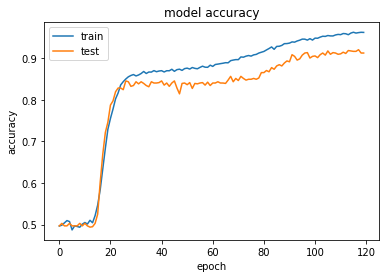

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating on Given Test Set

In [73]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [74]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [75]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [76]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [77]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [78]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999999


## Writing Your Own Stories and Questions

Remember you can only use words from the existing vocab

In [79]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [80]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [81]:
my_question = "Is the football in the garden ?"

In [82]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [83]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [84]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [85]:
pred_results = model.predict(([ my_story, my_ques]))

In [86]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.97079676


# Great Job!